In [103]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pulp import * 
import json

In [104]:
path = 'data/nutrition.csv'
df = pd.read_csv(path).drop('Unnamed: 0', axis=1)
df.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [105]:
df = df[['name','calories','carbohydrate','total_fat','protein']]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   calories      8789 non-null   int64 
 2   carbohydrate  8789 non-null   object
 3   total_fat     8789 non-null   object
 4   protein       8789 non-null   object
dtypes: int64(1), object(4)
memory usage: 343.4+ KB
None


,name,calories,carbohydrate,total_fat,protein
0,Cornstarch,381,91.27 g,0.1g,0.26 g
1,"Nuts, pecans",691,13.86 g,72g,9.17 g
2,"Eggplant, raw",25,5.88 g,0.2g,0.98 g
3,"Teff, uncooked",367,73.13 g,2.4g,13.30 g
4,"Sherbet, orange",144,30.40 g,2g,1.10 g


In [106]:
df.isna().sum()

name            0
calories        0
carbohydrate    0
total_fat       0
protein         0
dtype: int64

In [107]:
calories_min = df['calories'].min()
calories_max = df['calories'].max()
print(f'min:{calories_min}, max:{calories_max}')

min:0, max:902


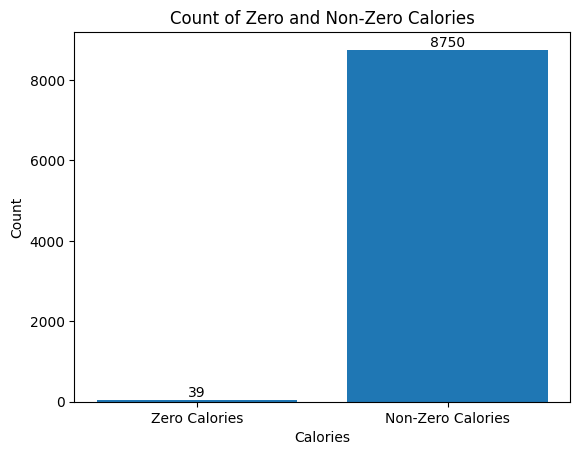

In [108]:
# Count the occurrences of 0 in "calories" column
zero_count = (df['calories'] == 0).sum()

# Count the occurrences of non-zero values in "calories" column
non_zero_count = (df['calories'] != 0).sum()

# Create a bar plot
plt.bar(['Zero Calories', 'Non-Zero Calories'], [zero_count, non_zero_count])

# Add labels and title
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Count of Zero and Non-Zero Calories')

plt.text(0, zero_count, str(zero_count), ha='center', va='bottom')
plt.text(1, non_zero_count, str(non_zero_count), ha='center', va='bottom')

# Display the plot
plt.show()


In [109]:
df['carbohydrate'] = np.array([df['carbohydrate'].tolist()[i].split(' ') for i in range(len(df))])[:,0].astype('float')
df['protein'] = np.array([df['protein'].tolist()[i].split(' ') for i in range(len(df))])[:,0].astype('float')
df['total_fat'] = np.array([df['total_fat'].tolist()[i].split('g') for i in range(len(df))])[:,0].astype('float')
df.loc[df['calories'] == 0, 'calories'] = 0.001

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8789 non-null   object 
 1   calories      8789 non-null   float64
 2   carbohydrate  8789 non-null   float64
 3   total_fat     8789 non-null   float64
 4   protein       8789 non-null   float64
dtypes: float64(4), object(1)
memory usage: 343.4+ KB


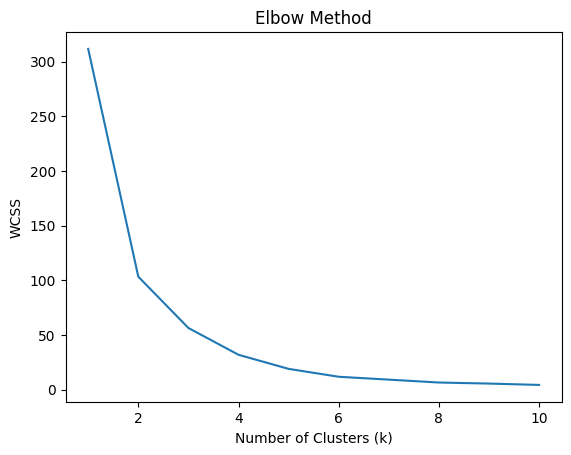

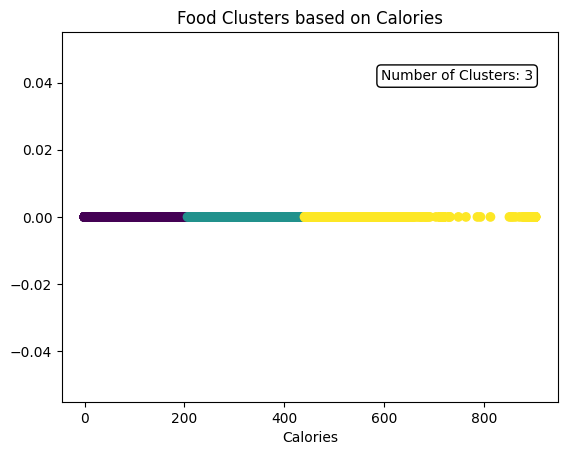

Cluster 0:
Minimum Calories: 0.001
Maximum Calories: 204.0
                                                   name  calories  \
2                                         Eggplant, raw      25.0   
4                                       Sherbet, orange     144.0   
5                                      Cauliflower, raw      25.0   
6                                      Taro leaves, raw      42.0   
10                                  PACE, Picante Sauce      25.0   
...                                                 ...       ...   
8781  Beef, raw, choice, trimmed to 1/8" fat, separa...     161.0   
8783  Beef, raw, all grades, trimmed to 0" fat, sepa...     124.0   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...     125.0   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...     121.0   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...     121.0   

      carbohydrate  total_fat  protein  
2             5.88        0.2     0.98  
4            30.40        2.0 

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Extract the relevant features from the df dataframe
features = df[['calories']]

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Plot optimal K
def optimal_k(data, max_k):
    wcss = []  # Within-cluster sum of squares

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=21, n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Save the WCSS

    # Plot the WCSS values
    plt.plot(range(1, max_k+1), wcss)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

max_clusters = 10  # Maximum number of clusters to consider
optimal_k(scaled_features, max_clusters)

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=21, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.scatter(df['calories'], [0] * len(df), c=clusters, cmap='viridis')
plt.xlabel('Calories')
plt.title('Food Clusters based on Calories')
plt.text(0.95, 0.9, f'Number of Clusters: {k}', transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white'))
plt.show()

# Iterate over each cluster
for cluster_id in range(kmeans.n_clusters):
    cluster_data = df[clusters == cluster_id]
    min_calories = cluster_data['calories'].min()
    max_calories = cluster_data['calories'].max()

    print(f"Cluster {cluster_id}:")
    print("Minimum Calories:", min_calories)
    print("Maximum Calories:", max_calories)
    print(cluster_data)
    print()

In [112]:
# Shuffle the DataFrame randomly
shuffled_data = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Create a dictionary to store food data for each day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfd = dict(zip(days, [pd.DataFrame()] * len(days)))

# Iterate over each cluster
for cluster_id in range(kmeans.n_clusters):
    # Filter the data points belonging to the current cluster
    cluster_data = shuffled_data[clusters == cluster_id]

    # Calculate the number of data points per day
    num_per_day = len(cluster_data) // 7

    # Distribute the data points evenly across the days
    for day_index, day in enumerate(dfd.keys()):
        start_index = day_index * num_per_day
        end_index = start_index + num_per_day
        dfd[day] = pd.concat([dfd[day], cluster_data.iloc[start_index:end_index]], ignore_index=True)

# Iterate over each day's data and assign cluster labels
for day, day_data in dfd.items():
    # Extract the relevant features for clustering
    features = day_data[['calories']]

    # Scale the features using the same scaler used before
    scaled_features = scaler.transform(features)

    # Assign cluster labels using the pre-trained KMeans model
    clusters = kmeans.predict(scaled_features)

    # Add a new column 'Cluster' to the day's data to store the cluster labels
    day_data['cluster'] = clusters

    # Update the data for the current day in the days_data dictionary
    dfd[day] = day_data

# View the assigned clusters for each day's data
for day, day_data in dfd.items():
    print(f"Data for {day}:")
    print(day_data)
    print()


Data for Monday:
                                                   name  calories  \
0                 Beverages, Cran Lemonade, OCEAN SPRAY      45.0   
1     Pork, broiled, cooked, separable lean only, bo...     186.0   
2     Cauliflower, without salt, drained, boiled, co...      19.0   
3                                 Pears, red anjou, raw      62.0   
4     MARTHA WHITE FOODS, dry, Martha White's Butter...     388.0   
...                                                 ...       ...   
1249  Beef, raw, choice, trimmed to 1/8" fat, separa...     228.0   
1250      Snacks, with peanuts, caramel-coated, popcorn     400.0   
1251   HEALTHY REQUEST, condensed, Cream of Celery Soup      56.0   
1252  Fast foods, with cone, soft-serve ice cream, l...     163.0   
1253                      Tofu, dried-frozen (koyadofu)     477.0   

      carbohydrate  total_fat  protein  cluster  
0            11.12        0.0     0.07        0  
1             0.00        8.4    25.79        0  
2   

In [113]:
dfd['Monday'].head()

,name,calories,carbohydrate,total_fat,protein,cluster
0,"Beverages, Cran Lemonade, OCEAN SPRAY",45.0,11.12,0.0,0.07,0
1,"Pork, broiled, cooked, separable lean only, bo...",186.0,0.00,8.4,25.79,0
2,"Cauliflower, without salt, drained, boiled, co...",19.0,3.75,0.2,1.61,0
3,"Pears, red anjou, raw",62.0,14.94,0.1,0.33,0
4,"MARTHA WHITE FOODS, dry, Martha White's Butter...",388.0,59.41,13.0,7.81,1


In [114]:
# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate over each day's data and add the "Day" column
for day, day_data in dfd.items():
    # Add the "Day" column to the day's data
    day_data['day'] = day

    # Append the day's data to the combined DataFrame
    combined_data = pd.concat([combined_data, day_data], ignore_index=True)

# Define the filename for the CSV file
filename = "processed_dataset.csv"

# Export the combined data to CSV
combined_data.to_csv(filename, index=False)

print(f"Combined data exported to {filename}")

Combined data exported to processed_dataset.csv


In [115]:
def build_nutritional_values(kg, calories):
    protein_calories = kg * 4
    carb_calories = calories / 2.
    fat_calories = calories - carb_calories - protein_calories
    res = {
        'carbohydrate calories': carb_calories,
        'total_fat calories': fat_calories,
        'protein calories': protein_calories
    }
    return res

In [116]:
def extract_gram(table):
    protein_grams = table['protein calories'] / 4.
    carbs_grams = table['carbohydrate calories'] / 4.
    fat_grams = table['total_fat calories'] / 9.
    res = {
        'Protein Grams': protein_grams,
        'Carbohydrates Grams': carbs_grams,
        'Fat Grams': fat_grams
    }
    return res

In [117]:
build_nutritional_values(70,2000)

{'carbohydrate calories': 1000.0,
 'total_fat calories': 720.0,
 'protein calories': 280}

In [118]:
extract_gram(build_nutritional_values(70,2000))

{'Protein Grams': 70.0, 'Carbohydrates Grams': 250.0, 'Fat Grams': 80.0}

In [119]:
def model(day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = dfd[day]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    values = [v.varValue for v in prob.variables()]
    values = np.round(values, 2).astype(float)
    sol = pd.DataFrame({'Food': food, 'Quantity': values})
    sol = sol[sol['Quantity'] != 0.0]
    sol['Quantity'] *= 100
    sol.rename(columns={'Quantity': 'Quantity (g)'}, inplace=True)
    sol['Cluster'] = day_data.loc[sol.index, 'cluster'].tolist()
    return sol

In [120]:
model('Monday',60,2000)

,Food,Quantity (g),Cluster
66,"Babyfood, apple and sweet potato, fruit and ve...",150.0,0
240,"Beef, roasted, cooked, select, trimmed to 0"" f...",150.0,1
248,"Cookies, baked, refrigerated dough, chocolate ...",150.0,2
399,"Salad dressing, without salt, regular, commerc...",150.0,2
512,"Cookies, made with margarine, prepared from re...",6.0,2
776,"Snacks, plain, bagel chips",150.0,2
778,"Cheese, gruyere",76.0,1
857,"Infant formula, 20 calories ready-to-feed, Pre...",14.0,0
1136,"Spices, dried, dill weed",150.0,1
